In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from data_structs import NewsDataLoader, EvaluationDataLoader, ScorePackage
from utils import model_predict, model_evaluate, model_predict_evaluate

#importing the data
news = pd.read_csv('../dataset_processed/fakeNews_titleStemming_Sampled.csv', index_col=0)
news.reset_index(inplace=True)

from sklearn.model_selection import train_test_split
train_news, test_news = train_test_split(news, test_size=0.2, 
                                         random_state=7)

train_news_predictors_rnn = train_news['title']
train_news_predictors = train_news.drop(columns = ['title', 'label'])
train_news_target = train_news['label']
train_news_loader = NewsDataLoader(train_news_predictors, train_news_target)
train_news_loader_rnn = NewsDataLoader(train_news_predictors_rnn, train_news_target)

test_news_predictors_rnn = test_news['title']
test_news_predictors = test_news.drop(columns = ['title', 'label'])
test_news_target = test_news['label']
test_news_loader = NewsDataLoader(test_news_predictors, test_news_target)
test_news_loader_rnn = NewsDataLoader(test_news_predictors_rnn, test_news_target)

In [2]:
from sklearn.ensemble import RandomForestClassifier
model_randomForest = RandomForestClassifier(max_depth=20, min_samples_split=10, 
                                   max_features=20000, n_estimators=100, oob_score=True)

model_randomForest.fit(train_news_loader.predictors, 
                       train_news_loader.target)

RandomForestClassifier(max_depth=20, max_features=20000, min_samples_split=10,
                       oob_score=True)

For <randomForest> evaluated on <train> Dataset:
    - accuracy: 0.936
    - precisionn: 1.0
    - recall: 0.867
    - f1 score: 0.936
For <randomForest> evaluated on <test> Dataset:
    - accuracy: 0.91
    - precisionn: 0.977
    - recall: 0.84
    - f1 score: 0.91


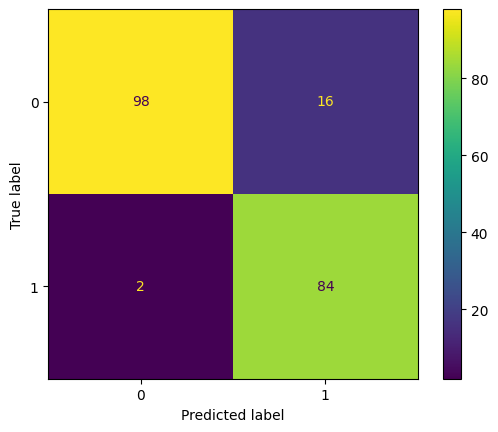

In [3]:
score_package_train_randomForest, score_package_test_randomForest = model_predict_evaluate(
        model=model_randomForest, 
        name_model='randomForest', 
        train_news_loader=train_news_loader,
        test_news_loader=test_news_loader
)

In [4]:
from sklearn.ensemble import RandomForestClassifier
model_randomForest = RandomForestClassifier(max_depth=20, min_samples_split=10, 
                                   max_features=20000, n_estimators=100, oob_score=True)

model_randomForest.fit(train_news_predictors, train_news_target)

from sklearn.model_selection import GridSearchCV

model_randomForest = RandomForestClassifier(max_depth=20, min_samples_split=10, 
                                   max_features=20000, n_estimators=100, oob_score=True)

parms = {
         'max_depth': [10, 20, 30],
         'min_samples_split': [5, 10, 20],
         'max_features': [10, 20000, 40000],
         'n_estimators': [100],
        }

grid = GridSearchCV(
    model_randomForest, parms, cv = 5, 
    scoring = 'f1').fit(train_news_loader.predictors, 
                        train_news_loader.target)
print(grid.best_estimator_)
grid.best_score_

RandomForestClassifier(max_depth=20, max_features=20000, min_samples_split=5,
                       oob_score=True)


0.8928588778819968

For <randomForest> evaluated on <train> Dataset:
    - accuracy: 0.95
    - precisionn: 1.0
    - recall: 0.893
    - f1 score: 0.949
For <randomForest> evaluated on <test> Dataset:
    - accuracy: 0.91
    - precisionn: 0.977
    - recall: 0.84
    - f1 score: 0.91


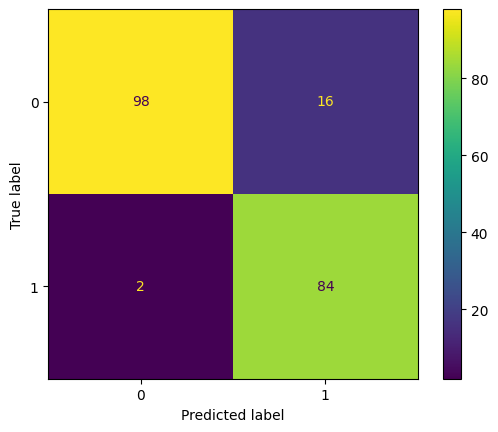

In [5]:
model_randomForest = grid.best_estimator_
score_package_train_logisticRegression, score_package_test_logisticRegression = model_predict_evaluate(
        model=model_randomForest, 
        name_model='randomForest', 
        train_news_loader=train_news_loader,
        test_news_loader=test_news_loader
)